In [1]:
import random
import time
import matplotlib.pyplot as plt

# P1(a): Quicksort con mediana de 3

### Quicksort normal

In [2]:
#Quicksort normal (citado en informe)
def partition(array, low, high):
    # choose the rightmost element as pivot
    pivot = array[high]
    # pointer for greater element
    i = low - 1
    # traverse through all elements
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:
          # If element smaller than pivot is found
            # swap it with the greater element pointed by i
            i = i + 1
            # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])
    # Swap the pivot element with the greater element specified by i
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    # Return the position from where partition is done
    return i + 1

def Quicksort(array, low, high):
    if low < high:
        # Find pivot element such that
        # element smaller than pivot are on the left
        # element greater than pivot are on the right
        pi = partition(array, low, high)
        # Recursive call on the left of pivot
        Quicksort(array, low, pi - 1)
        # Recursive call on the right of pivot
        Quicksort(array, pi + 1, high)

def quicksort_normal(L):
    Quicksort(L, 0, len(L)-1)
    

### Quicksort con mediana de tres

In [3]:
def Md3(L,low,high):
    mid = (low+high) // 2 # Se obtiene punto medio
    # Ordenar los tres valores de menor a mayor
    if L[low] > L[mid]:
        L[low], L[mid] = L[mid], L[low]
    if L[low] > L[high]:
        L[low], L[high] = L[high], L[low]
    if L[mid] > L[high]:
        L[mid], L[high] = L[high], L[mid]

    # Colocar la mediana como pivote
    L[mid], L[high] = L[high], L[mid]
    return L[high]

def partition2(L, low, high): #Misma funcion de particion que antes solo cambiando el pivote
    pivot = Md3(L,low,high)
    i = low - 1
    for j in range(low, high):
        if L[j] <= pivot:
            i = i + 1
            (L[i], L[j]) = (L[j], L[i])
    (L[i + 1], L[high]) = (L[high], L[i + 1])
    return i + 1

def quicksort(L, low, high):
    if low < high:
        pivote = partition2(L, low, high)
        quicksort(L, low, pivote - 1)
        quicksort(L, pivote + 1, high)


def quicksort_con_Md3(L):
    quicksort(L, 0, len(L)-1)
    

### Funcion para generar arreglos

In [4]:
def arreglo(a, b, n):
    if a > b:
        print("'a' debe ser menor o igual a 'b'.")
    if n <= 0:
        print("El tamaño del arreglo debe ser mayor que cero.")
    return [random.randint(a, b) for _ in range(n)]

In [5]:
#Pruebas para comprobar funcionamiento de los quicksort:
print("Prueba para quicksort normal")
A = arreglo(-10,10,15)
print("    Arreglo desordenado:")
print(A)
print("    Arreglo ordenado:")
quicksort_normal(A)
print(A)
print("    ")
print("Prueba para quicksort con mediana de 3")
B = arreglo(-10,10,15)
print("    Arreglo desordenado:")
print(B)
print("    Arreglo ordenado:")
quicksort_con_Md3(B)
print(B)

Prueba para quicksort normal
    Arreglo desordenado:
[-8, -2, 4, -5, 2, -8, -7, 2, 4, 6, -8, 9, -8, 5, 8]
    Arreglo ordenado:
[-8, -8, -8, -8, -7, -5, -2, 2, 2, 4, 4, 5, 6, 8, 9]
    
Prueba para quicksort con mediana de 3
    Arreglo desordenado:
[-8, 6, -10, -4, 6, -9, -2, 8, 3, 4, 7, -7, 0, 3, -3]
    Arreglo ordenado:
[-10, -9, -8, -7, -4, -3, -2, 0, 3, 3, 4, 6, 6, 7, 8]


### Funcion para medir tiempo

In [6]:
# Funcion reutilizada de la tarea 1
def tiempoFuncion(function):
    def wrapper(*args, **kwargs):
        import time
        inicio = time.time() # Tiempo inicial de la funcion
        resultado = function(*args, **kwargs) # Se ejecuta la funcion
        total = time.time() - inicio # Tiempo al finalizar la funcion
        return resultado,total 
    return wrapper

### Comparación de rendimiento

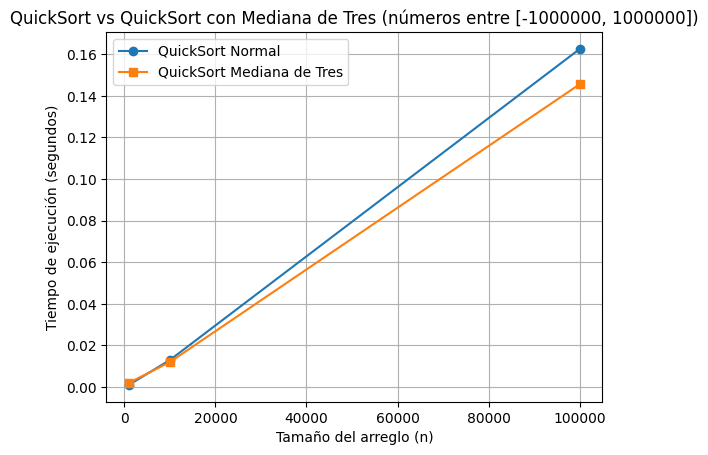

In [7]:
#Funciones con decorador de tiempo
@tiempoFuncion
def quicksort_normal_t(L):
    quicksort_normal(L)

@tiempoFuncion
def quicksort_mediana_t(L):
    quicksort_con_Md3(L)

#Funcion para comparar rendimiento y graficar
def comparar_rendimiento():
    # Tamaños de los arreglos
    tamanos = [10**3, 10**4, 10**5]
    tiempos_normal = []
    tiempos_md3 = []

    for n in tamanos:
        # Generar un arreglo aleatorio y copiarlo
        arr = arreglo(-1000000, 1000000, n)
        arr_copia_normal = arr
        arr_copia_md3 = arr
        # Medir QuickSort normal
        _, tiempo_normal = quicksort_normal_t(arr_copia_normal)
        tiempos_normal.append(tiempo_normal)
        # Medir QuickSort con Mediana de Tres
        _, tiempo_md3 = quicksort_mediana_t(arr_copia_md3)
        tiempos_md3.append(tiempo_md3)

    # Graficar
    plt.plot(tamanos, tiempos_normal, marker='o', label='QuickSort Normal')
    plt.plot(tamanos, tiempos_md3, marker='s', label='QuickSort Mediana de Tres')
    plt.xlabel('Tamaño del arreglo (n)')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title('QuickSort vs QuickSort con Mediana de Tres (números entre [-1000000, 1000000])')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para comparar
comparar_rendimiento()

# P1(b), Radix y datos alfanuméricos

### Array de datos alfanuméricos

In [8]:
#Definimos las cadenas de string a juntar
num=["0","1","2","3","4","5","6","7","8","9"]
alf = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
       "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
T = num + alf

def datos_alfnum(n, min, max):
    # 'n' será el largo del array, min y max indican el largo minimo y máximo de cada dato alfanumérico que compone al array
    L = []
    for i in range(n):
        k = random.randint(min, max)
        palabra = []
        for j in range(k):
            palabra.append(random.choice(T))
        L.append("".join(palabra))
    return L

In [9]:
A = datos_alfnum(10,2,10)
print(A)

['3xd', '6IxnoU', '78pyr', 'uX5O', 'rqBGJQVk0q', 'FknrF', 'PqbHo', '0GnXfHFnm', 'aOwvb0QlZ', 'r3']


### RadixSort y CountingSort

In [10]:
def countingSort(L, indx, max_len):
    n = len(L)
    out = [""] * n
    count = [0] * 128 

    for i in range(n):
        # Si el string no tiene carácter en la posicion 'indx', usar valor ASCII 0
        if max_len - indx - 1 < len(L[i]):
            char = ord(L[i][max_len - indx - 1])
        else:
            char = 0
        count[char] += 1
    for i in range(1, 128):
        count[i] += count[i - 1]

    for i in range(n - 1, -1, -1):
        if max_len - indx - 1 < len(L[i]):
            char = ord(L[i][max_len - indx - 1])
        else:
            char = 0
        out[count[char] - 1] = L[i]
        count[char] -= 1
    for i in range(n):
        L[i] = out[i]


def radixSort(L):
    max_len = max(len(s) for s in L)
    for indx in range(max_len):
        countingSort(L, indx, max_len)
    return L

In [11]:
print("Prueba de ordenar caracteres similares:")
A = ["abc4","abc31","abc2","abc"]
print("Antes de ordenar:", A)
AA = radixSort(A)
print("Después de ordenar:", AA)

print(" ")
print("Prueba de ordenar datos alfanuméricos aleatorios:")
C = datos_alfnum(10,2,5)
print("Antes de ordenar:", C)
CC = radixSort(C)
print("Después de ordenar:", CC)
    

Prueba de ordenar caracteres similares:
Antes de ordenar: ['abc4', 'abc31', 'abc2', 'abc']
Después de ordenar: ['abc', 'abc2', 'abc31', 'abc4']
 
Prueba de ordenar datos alfanuméricos aleatorios:
Antes de ordenar: ['LgZ', '3ua', 'oQltB', 'P2He', 'ST8', 'YcBtJ', 'C7RJ', '6z', 'V4xGL', 'y2p9r']
Después de ordenar: ['3ua', '6z', 'C7RJ', 'LgZ', 'P2He', 'ST8', 'V4xGL', 'YcBtJ', 'oQltB', 'y2p9r']


### Rendimiento

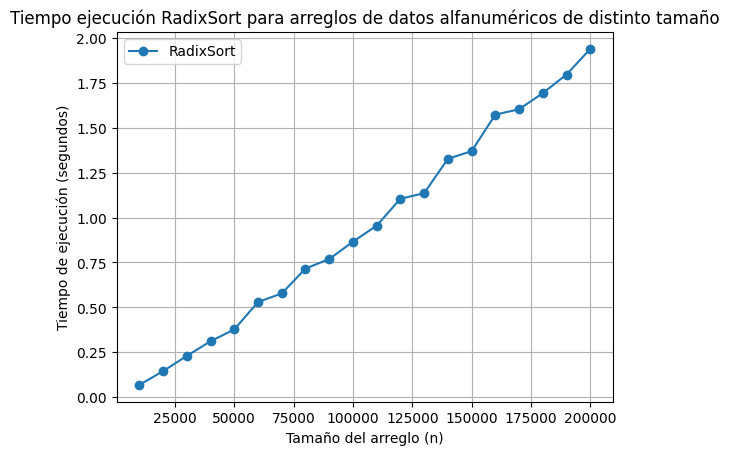

In [12]:
@tiempoFuncion
def RadixSort_t(L):
    radixSort(L)

def rendimiento_radix():
    # Tamaños de los arreglos
    a = 10**4 # Tamaño minimo de 10 000
    tamanos = [a,2*a,3*a,4*a,5*a,6*a,7*a,8*a,9*a,10*a,11*a,12*a,13*a,14*a,15*a,16*a,17*a,18*a,19*a,20*a]
    tiempos = []

    for n in tamanos:
        # Generar un arreglo aleatorio y copiarlo
        arr = datos_alfnum(n,2,20)
        _, tiempo = RadixSort_t(arr)
        tiempos.append(tiempo)
    # Graficar
    plt.plot(tamanos, tiempos, marker='o', label='RadixSort')
    plt.xlabel('Tamaño del arreglo (n)')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title('Tiempo ejecución RadixSort para arreglos de datos alfanuméricos de distinto tamaño')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para comparar
rendimiento_radix()  
  

# P1(c): Combsort

### BubbleSort

In [13]:
def BubbleSort(L):
    n = len(L)
    for i in range(n):
        swap = False
        for j in range(0, n-i-1):
            if L[j] > L[j+1]:
                L[j], L[j+1] = L[j+1], L[j]
                swap = True
        if (swap == False):
            break

### CombSort

In [14]:
#Primero hay que definir el gap
def next_gap(gap):
    gap = (gap*10)//13 # gap = gap / 1.3
    if gap < 1:
        return 1
    return gap

#CombSort
def CombSort(L):
    n = len(L)
    gap = n # gap inicial
    swap = True # True para iniciar while
    while gap != 1 or swap == True:
        gap = next_gap(gap) # Calcula gap de la iteracion
        swap = False # Setea swap en False (Si despues de la iteracion swap sige siendo falso, entonces termina, pues está ordenado)
        for i in range (0, n-gap): #Se hace el intercambio de los elementos del array, espaciados por el gap
            if L[i] > L[i+gap]:
                L[i],L[i+gap] = L[i+gap],L[i]
                swap = True # Si se realiza intercambio, entonces swap es True y el while continua

In [15]:
#Pruebas:
A = [1,5,2,5,50,20,1,20,3,8,24,35,0]
Ab = A
Ac = A
BubbleSort(Ab)
CombSort(Ac)
print(A)
print("Arreglo ordenado con BubbleSort: ", Ab)
print("Arreglo ordenado con CombSort: ", Ac)


[0, 1, 1, 2, 3, 5, 5, 8, 20, 20, 24, 35, 50]
Arreglo ordenado con BubbleSort:  [0, 1, 1, 2, 3, 5, 5, 8, 20, 20, 24, 35, 50]
Arreglo ordenado con CombSort:  [0, 1, 1, 2, 3, 5, 5, 8, 20, 20, 24, 35, 50]


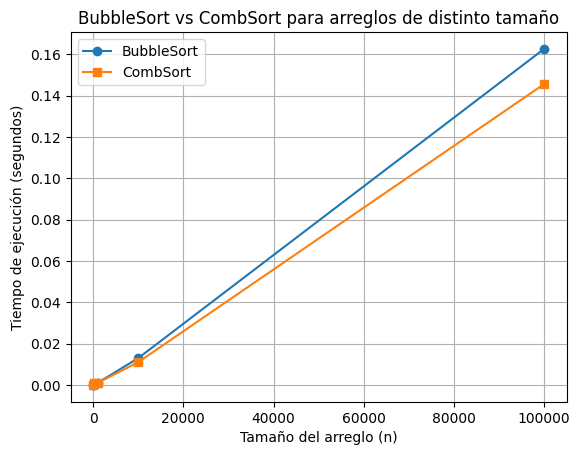

In [16]:
#Funciones con decorador de tiempo
@tiempoFuncion
def BubbleSort_t(L):
    BubbleSort(L)

@tiempoFuncion
def CombSort_t(L):
    CombSort(L)

#Funcion para comparar rendimiento y graficar
def rendimiento_comb_bubble():
    # Tamaños de los arreglos
    tamanos = [10,10**2,10**3, 10**4, 10**5]
    tiempos_bubble = []
    tiempos_comb = []

    for n in tamanos:
        # Generar un arreglo aleatorio y copiarlo
        arr = arreglo(-1000000, 1000000, n)
        arr_copia_bubble = arr
        arr_copia_comb = arr
        # Medir BubbleSort
        _, tiempo_bubble = quicksort_normal_t(arr_copia_bubble)
        tiempos_bubble.append(tiempo_bubble)
        # Medir CombSort
        _, tiempo_comb = quicksort_mediana_t(arr_copia_comb)
        tiempos_comb.append(tiempo_comb)
    # Graficar
    plt.plot(tamanos, tiempos_bubble, marker='o', label='BubbleSort')
    plt.plot(tamanos, tiempos_comb, marker='s', label='CombSort')
    plt.xlabel('Tamaño del arreglo (n)')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title('BubbleSort vs CombSort para arreglos de distinto tamaño')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para comparar
rendimiento_comb_bubble()

# P2(a): Implementación de una Tabla Hash con Resolución de Colisiones por Doble Hashing

### Doble Hashing

In [159]:
class DobleHashing:
    def __init__(self,size):
        self.size = int(size)
        self.tabla = [None]*int(size) # Tabla vacia
        self.colisiones = 0 # Contador de colisiones

    def hash1(self,llave): # Metodo de la divison
        return llave % self.size
    def hash2(self,llave): # Metodo de la multiplicacion
        A = 0.618033
        b = (llave * A) % 1  # k*A mod 1
        return int(b * self.size)
    
    #Funciones
    def insert(self,llave):
        h = self.hash1(llave)
        s = self.hash2(llave)

        for i in range(self.size):
            hh = (h + i*s) % self.size
            if self.tabla[hh] is None:
                self.tabla[hh] = llave
                return
            
        self.colisiones += 1 # No se pudo insertar
        return
        
    def search(self,llave):
        h = self.hash1(llave)
        s = self.hash2(llave)
        
        for i in range(self.size):
            hh = (h + i*s) % self.size
            if self.tabla[hh] == llave:
                return True #Si se encuentra retorna True
        return False #Si no se encuentra retorna False
    
    def delete(self,llave):
        h = self.hash1(llave)
        s = self.hash2(llave)

        for i in range(self.size):
            hh = (h + i*s) % self.size
            if self.tabla[hh] == llave:
                self.tabla[hh] = None
                return
        print("No existe la llave ",llave," dentro de la tabla")
        return

#### Pruebas

In [160]:
print("Prueba insert y colisiones: ")
A = DobleHashing(10)
A.insert(5)
A.insert(5)
A.insert(4)
A.insert(11)
A.insert(5)
A.insert(10)

A.tabla,A.colisiones

Prueba insert y colisiones: 


([10, 11, None, None, 4, 5, None, None, None, None], 2)

In [161]:
print("Prueba search")
print ("Busqueda de 10: ")
print(A.search(10))

print ("Busqueda de 4: ")
print(A.search(4))

print ("Busqueda de 11: ")
print(A.search(11))

print ("Busqueda de 20 (no insertado): ")
print(A.search(20))


Prueba search
Busqueda de 10: 
True
Busqueda de 4: 
True
Busqueda de 11: 
True
Busqueda de 20 (no insertado): 
False


In [154]:
print("Prueba delete y search")
A = DobleHashing(10)

A.insert(5)
A.insert(15)
A.insert(25)

print("Tabla insertando 5,15,25: ", A.tabla)
print(" ")

A.delete(15)
print("Tabla después de eliminar 15: ",A.tabla)
print(" ")

print("Busqueda de 25: ")
print(A.search(25))
print(" ")

print("Busqueda de 35 (no insertado): ")
print(A.search(35))
print(" ")

print("Eliminar 35 (no insertado): ")
A.delete(35)

Prueba delete y search
Tabla insertando 5,15,25:  [None, None, None, None, None, 5, None, 15, None, 25]
 
Tabla después de eliminar 15:  [None, None, None, None, None, 5, None, None, None, 25]
 
Busqueda de 25: 
True
 
Busqueda de 35 (no insertado): 
False
 
Eliminar 35 (no insertado): 
No existe la llave  35  dentro de la tabla


### Hashing con Encadenamiento

In [158]:
class Cola:
    def __init__(self):
        self.q=[]
    def enq(self,x):
        self.q.insert(0,x)
    def deq(self):
        assert len(self.q)>0
        return self.q.pop()
    def is_empty(self):
        return len(self.q)==0


class HashingEnc:
    def __init__(self,size):
        self.size = int(size)
        self.tabla = [Cola() for i in range(self.size)] # Tabla de colas vacias
        self.colisiones = 0 # Contador de colisiones

    def hash(self,llave): # Metodo de la division
        return llave % self.size
    
    #Funciones
    def insert(self,llave):
        h = self.hash(llave)
        if self.tabla[h].is_empty() == False:
            self.colisiones += 1
        self.tabla[h].enq(llave)
        return

    def search(self,llave):
        h = self.hash(llave)
        for i,j in enumerate(self.tabla[h].q):
            if j == llave:
                return True
        return False

    def delete(self,llave):
        h = self.hash(llave)
        if self.search(llave) is not False:
            nueva_cola = Cola()
            eliminado = False # Para eliminar llave una sola vez en caso de repeticion
            while not self.tabla[h].is_empty():
                elemento = self.tabla[h].deq()
                if elemento == llave and eliminado == False:
                    eliminado = True # No guarda la llave, y setea eliminado en True (para guardar todo una vez eliminado)
                else:
                    nueva_cola.enq(elemento)
            self.tabla[h] = nueva_cola
        else:
            print("No existe la llave ",llave," dentro de la tabla")
            return
        
    def display(self):
        for i, cola in enumerate(self.tabla):
            print(f"Índice {i}: {[elemento for elemento in cola.q]}")


#### Pruebas

In [148]:
print("Prueba insert y colisiones: ")
A = HashingEnc(10)
A.insert(5)
A.insert(5)
A.insert(4)
A.insert(11)
A.insert(5)
A.insert(10)
A.display()
A.colisiones


Prueba insert y colisiones: 
Índice 0: [10]
Índice 1: [11]
Índice 2: []
Índice 3: []
Índice 4: [4]
Índice 5: [5, 5, 5]
Índice 6: []
Índice 7: []
Índice 8: []
Índice 9: []


2

In [150]:
print("Prueba search")
print ("Busqueda de 10: ")
print(A.search(10))

print ("Busqueda de 4: ")
print(A.search(4))


print ("Busqueda de 11: ")
print(A.search(11))


print ("Busqueda de 20 (no insertado): ")
print(A.search(20))

Prueba search
Busqueda de 10: 
True
Busqueda de 4: 
True
Busqueda de 11: 
True
Busqueda de 20 (no insertado): 
False


In [156]:
print("Prueba delete y search")
A = HashingEnc(10)

A.insert(5)
A.insert(15)
A.insert(25)

print("Tabla insertando 5,15,25: ", A.display())
print(" ")

A.delete(15)
print("Tabla después de eliminar 15: ",A.display())
print(" ")

print("Busqueda de 25: ")
print(A.search(25))
print(" ")

print("Busqueda de 35 (no insertado): ")
print(A.search(35))
print(" ")

print("Eliminar 35 (no insertado): ")
A.delete(35)

Prueba delete y search
Índice 0: []
Índice 1: []
Índice 2: []
Índice 3: []
Índice 4: []
Índice 5: [25, 15, 5]
Índice 6: []
Índice 7: []
Índice 8: []
Índice 9: []
Tabla insertando 5,15,25:  None
 
Índice 0: []
Índice 1: []
Índice 2: []
Índice 3: []
Índice 4: []
Índice 5: [25, 5]
Índice 6: []
Índice 7: []
Índice 8: []
Índice 9: []
Tabla después de eliminar 15:  None
 
Busqueda de 25: 
True
 
Busqueda de 35 (no insertado): 
False
 
Eliminar 35 (no insertado): 
No existe la llave  35  dentro de la tabla


### Rendimiento

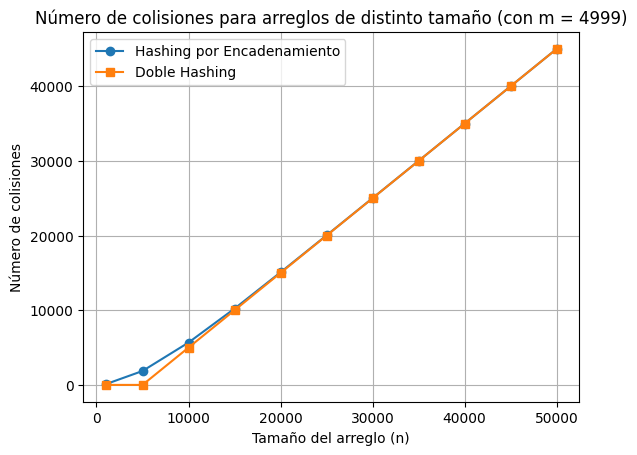

In [169]:
def rendimiento_hashing():
    # Tamaños de los arreglos
    a = 1000
    tamanos = [a,5*a,10*a,15*a,20*a,25*a,30*a,35*a,40*a,45*a,50*a]
    m = 4999  # Tamaño de la tabla hash (un número primo grande)
    # Listas para almacenar el número de colisiones
    colisiones_enc = []
    colisiones_dob = []

    for n in tamanos:
        # Generar un arreglo aleatorio para insertar
        arr = arreglo(0,10**7,n)
        # Tablas hash
        Enc = HashingEnc(m)
        Dob = DobleHashing(m)

        # Medir colisiones para Hashing por Encadenamiento
        for i in arr:
            Enc.insert(i)
        colisiones_enc.append(Enc.colisiones)
        # Medir colisiones para Doble Hashing
        for i in arr:
            Dob.insert(i)
        colisiones_dob.append(Dob.colisiones)

    # Graficar
    plt.plot(tamanos, colisiones_enc, marker='o', label='Hashing por Encadenamiento')
    plt.plot(tamanos, colisiones_dob, marker='s', label='Doble Hashing')
    plt.xlabel('Tamaño del arreglo (n)')
    plt.ylabel('Número de colisiones')
    plt.title('Número de colisiones para arreglos de distinto tamaño (con m = 4999)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para comparar
rendimiento_hashing()

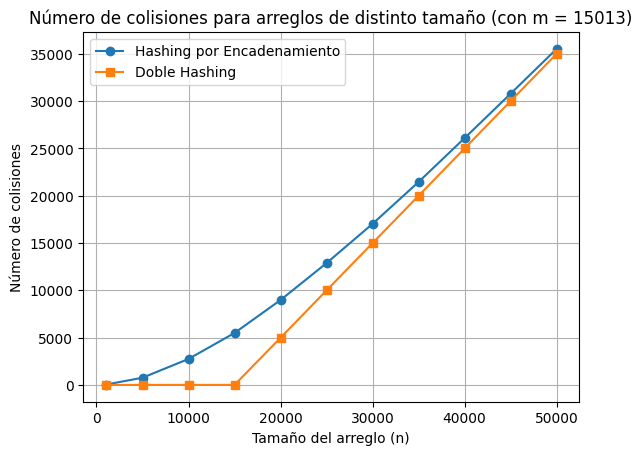

In [171]:
def rendimiento_hashing_m2():
    # Tamaños de los arreglos
    a = 1000
    tamanos = [a,5*a,10*a,15*a,20*a,25*a,30*a,35*a,40*a,45*a,50*a]
    m = 15013  # Tamaño de la tabla hash (un número primo grande)
    # Listas para almacenar el número de colisiones
    colisiones_enc = []
    colisiones_dob = []

    for n in tamanos:
        # Generar un arreglo aleatorio para insertar
        arr = arreglo(0,10**7,n)
        # Tablas hash
        Enc = HashingEnc(m)
        Dob = DobleHashing(m)

        # Medir colisiones para Hashing por Encadenamiento
        for i in arr:
            Enc.insert(i)
        colisiones_enc.append(Enc.colisiones)
        # Medir colisiones para Doble Hashing
        for i in arr:
            Dob.insert(i)
        colisiones_dob.append(Dob.colisiones)

    # Graficar
    plt.plot(tamanos, colisiones_enc, marker='o', label='Hashing por Encadenamiento')
    plt.plot(tamanos, colisiones_dob, marker='s', label='Doble Hashing')
    plt.xlabel('Tamaño del arreglo (n)')
    plt.ylabel('Número de colisiones')
    plt.title('Número de colisiones para arreglos de distinto tamaño (con m = 15013)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para comparar
rendimiento_hashing_m2()

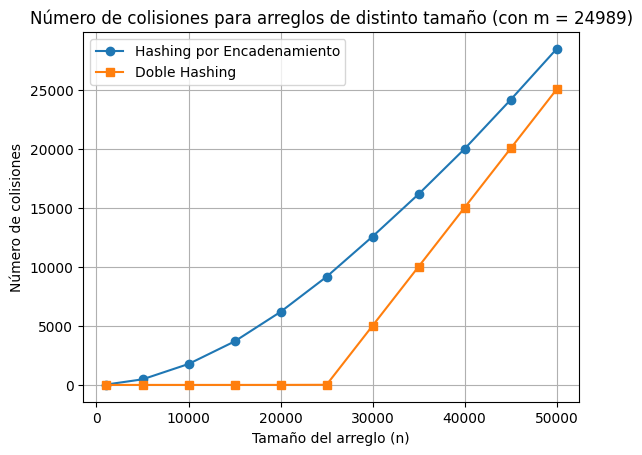

In [173]:
def rendimiento_hashing_m3():
    # Tamaños de los arreglos
    a = 1000
    tamanos = [a,5*a,10*a,15*a,20*a,25*a,30*a,35*a,40*a,45*a,50*a]
    m = 24989  # Tamaño de la tabla hash (un número primo grande)
    # Listas para almacenar el número de colisiones
    colisiones_enc = []
    colisiones_dob = []

    for n in tamanos:
        # Generar un arreglo aleatorio para insertar
        arr = arreglo(0,10**7,n)
        # Tablas hash
        Enc = HashingEnc(m)
        Dob = DobleHashing(m)

        # Medir colisiones para Hashing por Encadenamiento
        for i in arr:
            Enc.insert(i)
        colisiones_enc.append(Enc.colisiones)
        # Medir colisiones para Doble Hashing
        for i in arr:
            Dob.insert(i)
        colisiones_dob.append(Dob.colisiones)

    # Graficar
    plt.plot(tamanos, colisiones_enc, marker='o', label='Hashing por Encadenamiento')
    plt.plot(tamanos, colisiones_dob, marker='s', label='Doble Hashing')
    plt.xlabel('Tamaño del arreglo (n)')
    plt.ylabel('Número de colisiones')
    plt.title('Número de colisiones para arreglos de distinto tamaño (con m = 24989)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para comparar
rendimiento_hashing_m3()

# P2(c): Hash de Conteo de Elementos con Alta Frecuencia

In [199]:
class Hash_frec:
    def __init__(self,size):
        self.size = int(size)
        self.Tabla = HashingEnc(self.size)
    
    def insert_arr(self,L):
        for i in L:
            self.Tabla.insert(i)
    
    def contar_frec(self):
        frec = {}
        for i, cola in enumerate(self.Tabla.tabla):
            for j in cola.q:
                if j in frec:
                    frec[j] += 1
                else:
                    frec[j] = 1
        return frec
    
    def Display(self):
        self.Tabla.display()

#### Pruebas clase

In [201]:
m = 17
A = [4,2,5,6,1,2,5,6,12,22,6,7,12,1]
print("Prueba insert: ")
H = Hash_frec(m)
H.insert_arr(A)
H.Display()

Prueba insert: 
Índice 0: []
Índice 1: [1, 1]
Índice 2: [2, 2]
Índice 3: []
Índice 4: [4]
Índice 5: [22, 5, 5]
Índice 6: [6, 6, 6]
Índice 7: [7]
Índice 8: []
Índice 9: []
Índice 10: []
Índice 11: []
Índice 12: [12, 12]
Índice 13: []
Índice 14: []
Índice 15: []
Índice 16: []


In [204]:
print("Prueba contar frecuencias: ")
frec = H.contar_frec()
for i,f in frec.items():
        print("Dato: ", i, "| Frecuencia: ",f)

Prueba contar frecuencias: 
Dato:  1 | Frecuencia:  2
Dato:  2 | Frecuencia:  2
Dato:  4 | Frecuencia:  1
Dato:  22 | Frecuencia:  1
Dato:  5 | Frecuencia:  2
Dato:  6 | Frecuencia:  3
Dato:  7 | Frecuencia:  1
Dato:  12 | Frecuencia:  2


#### Funciones para contar frecuencias

In [ ]:
def frecs(L,m):
    H = Hash_frec(m)
    H.insert_arr(L)
    H.contar_frec()
    Arr = []
    for i,f in frec.items():
        Arr.append([f"{i}:",f]) #Diseñada para entregar algo similar a Counter
    return Arr

def frec_max(L,m):
    H = Hash_frec(m)
    H.insert_arr(L)
    frec = H.contar_frec()
    max_f = -1
    dato_asociado = []
    for i,f in frec.items():
        if f > max_f: #Si la frec vista es mayor que la registrada, se reemplazan valores
            max_f = f
            dato_asociado = [i]
        elif f == max_f: # Si elemento repite frec maxima, se agrupa con elementos con misma frec maxima
            dato_asociado.append(i)
    return dato_asociado,max_f

In [224]:
# Lo que se busca es ver si el resultado es similar a lo entregado por Counter
print("Prueba conteo de frecuencias: ")
a = frecs(A,17)
print(a)

Prueba conteo de frecuencias: 
[['1:', 2], ['2:', 2], ['4:', 1], ['22:', 1], ['5:', 2], ['6:', 3], ['7:', 1], ['12:', 2]]


In [220]:
print("Prueba frecuencia máxima: ")
f = frec_max(A,17)
print(f)
print(" ")
print("Prueba varios elementos con frecuencia máxima: ")
B = [1,1,1,1,3,3,4,3,4,3,5,7,2,6,8,65,8,9]
b = frec_max(B,17)
print(b)

Prueba frecuencia máxima: 
([6], 3)
 
Prueba varios elementos con frecuencia máxima: 
([1, 3], 4)


#### Comparación con Counter

In [ ]:
from collections import Counter
Count = Counter(A)
print(Count)

Counter({6: 3, 2: 2, 5: 2, 1: 2, 12: 2, 4: 1, 22: 1, 7: 1})


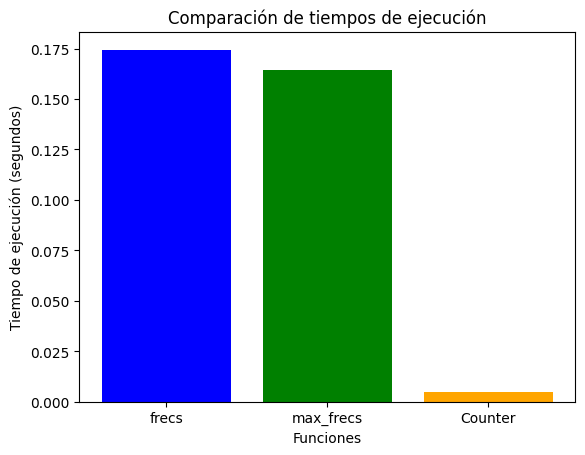

In [227]:
#Funciones con decorador de tiempo
@tiempoFuncion
def frecs_t(L,m):
    frecs(L,m)
    
@tiempoFuncion
def frec_max_t(L,m):
    frec_max(L,m)

@tiempoFuncion
def Counter_t(L):
    Counter(L)

#Funcion para comparar rendimiento y graficar
def rendimiento_frec():
    # Parámetros
    m = 100003  # Tamaño tabla Hash
    n = 100000  # Tamaño del array
    L = arreglo(-1000, 1000, n) 

    # Medir tiempo 
    _, tiempo_frecs = frecs_t(L, m)
    _, tiempo_max_frecs = frec_max_t(L, m)
    _, tiempo_counter = Counter_t(L) 

    # Gráfico
    tiempos = [tiempo_frecs, tiempo_max_frecs, tiempo_counter]
    labels = ['frecs', 'max_frecs', 'Counter']

    plt.bar(labels, tiempos, color=['blue', 'green', 'orange'])
    plt.xlabel('Funciones')
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title('Comparación de tiempos de ejecución')
    plt.show()
rendimiento_frec()